<a href="https://colab.research.google.com/github/degar405/ExperimentacoesPreDiagnosticoGlaucoma/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


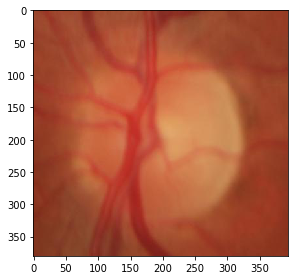

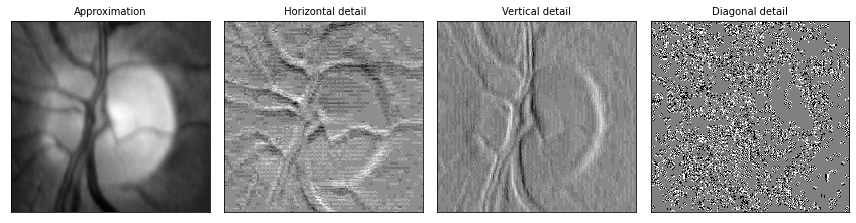

In [17]:
from google.colab import drive
from os import listdir
from skimage import io
import pywt
import numpy as np
import cv2
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/Colab Notebooks/Trabalho/'

def exibirImagensCoeficientesWavelet(coeffs):
  titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
  LL, (LH, HL, HH) = coeffs

  fig = plt.figure(figsize=(12, 3))
  for i, a in enumerate([LL, LH, HL, HH]):
      ax = fig.add_subplot(1, 4, i + 1)
      ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
      ax.set_title(titles[i], fontsize=10)
      ax.set_xticks([])
      ax.set_yticks([])

  fig.tight_layout()
  plt.show()

def separarCanaisRGB(imagem):
  canalR = []
  canalG = []
  canalB = []

  for linha in imagem:
    linhaR = []
    linhaG = []
    linhaB = []

    for pixel in linha:
      linhaR.append(pixel[0])
      linhaG.append(pixel[1])
      linhaB.append(pixel[2])

    canalR.append(linhaR)
    canalG.append(linhaG)
    canalB.append(linhaB)
  
  return (np.array(canalR), np.array(canalG), np.array(canalB))

def aplicarWavelet(imagem, implementacao):
  return pywt.dwt2(imagem, implementacao)

def combinarImagensEmTonsDeCinza(R, G, B):
  imagem = []
  quantidadeLinhas = len(R)
  quantidadeColunas = len(R[0])

  for nLinha in range(0, quantidadeLinhas):
    linha = []

    for nColuna in range(0, quantidadeColunas):
      pixel = round(0.2126 * R[nLinha][nColuna] + 0.7154 * G[nLinha][nColuna] + 0.0721 * B[nLinha][nColuna])
      linha.append(pixel)

    imagem.append(linha)

  return imagem

def combinarCoeficientesWavelet(coeficientesR, coeficientesG, coeficientesB):
  (LLR, (LHR, HLR, HHR)) = coeficientesR
  (LLG, (LHG, HLG, HHG)) = coeficientesG
  (LLB, (LHB, HLB, HHB)) = coeficientesB

  LL = combinarImagensEmTonsDeCinza(LLR, LLG, LLB)
  LH = combinarImagensEmTonsDeCinza(LHR, LHG, LHB)
  HL = combinarImagensEmTonsDeCinza(HLR, HLG, HLB)
  HH = combinarImagensEmTonsDeCinza(HHR, HHG, HHB)

  return (LL, (LH, HL, HH))

def aplicarDescritoresDeTextura(imagem, implementacaoWavelet):
  (canalR, canalG, canalB) = separarCanaisRGB(imagem)

  coeficientesWaveletR = aplicarWavelet(canalR, implementacaoWavelet)
  coeficientesWaveletG = aplicarWavelet(canalG, implementacaoWavelet)
  coeficientesWaveletB = aplicarWavelet(canalB, implementacaoWavelet)

  coeficientesWavelet = combinarCoeficientesWavelet(coeficientesWaveletR, coeficientesWaveletG, coeficientesWaveletB)

  #acompanhar o resultado do wavelet
  exibirImagensCoeficientesWavelet(coeficientesWavelet)


#print(pywt.families())
#print(pywt.wavelist())

#print(listdir(root_path))

imagemTeste = io.imread(root_path + "Normal/Im001.jpg")
io.imshow(imagemTeste)
io.show()
'''
(R, G, B) = separarCanaisRGB(imagemTeste)
io.imshow(R)
io.show()
io.imshow(G)
io.show()
io.imshow(B)
io.show()
'''
aplicarDescritoresDeTextura(imagemTeste, "haar")